# Logistic Regression
- Binary Classification model

## A simple example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [ ]:
X = np.concatenate((pass_time, fail_time))  # 아래와 동일
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [ ]:
X = np.hstack((pass_time,fail_time))          # stack horizontally
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [ ]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

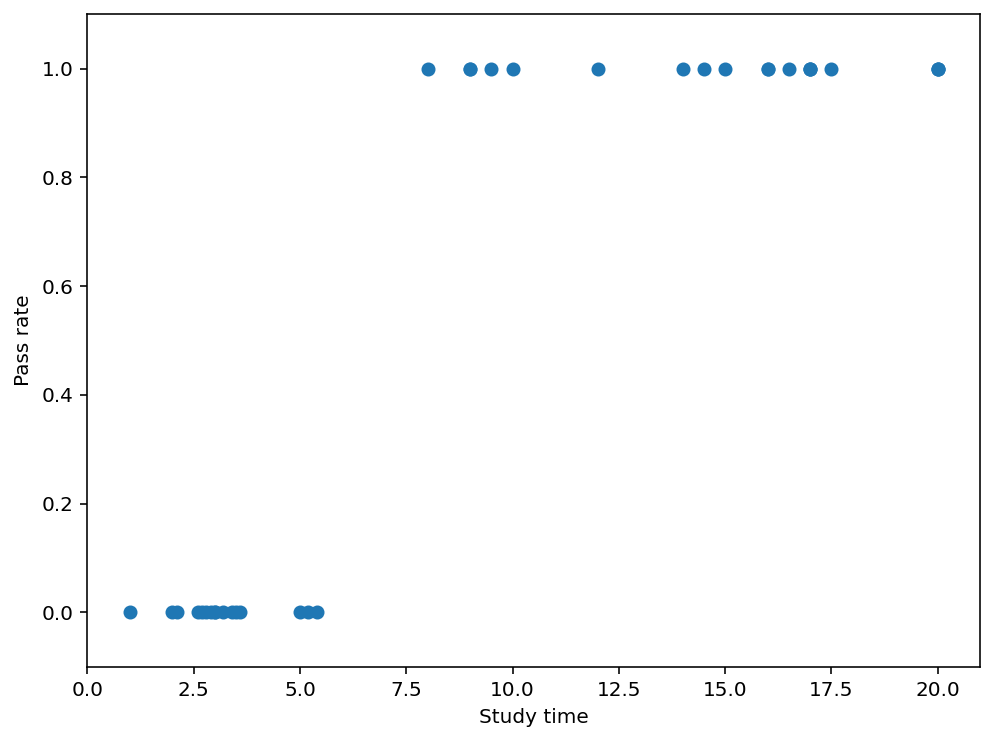

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

[[1.32952239]]
[-9.1854821]


In [ ]:
model.predict(np.array([6.9]).reshape(-1,1))

array([0])

In [ ]:
model.predict_proba(np.array([6.9]).reshape(-1,1))

array([[0.50294437, 0.49705563]])

[[1.32952239]] [-9.1854821]


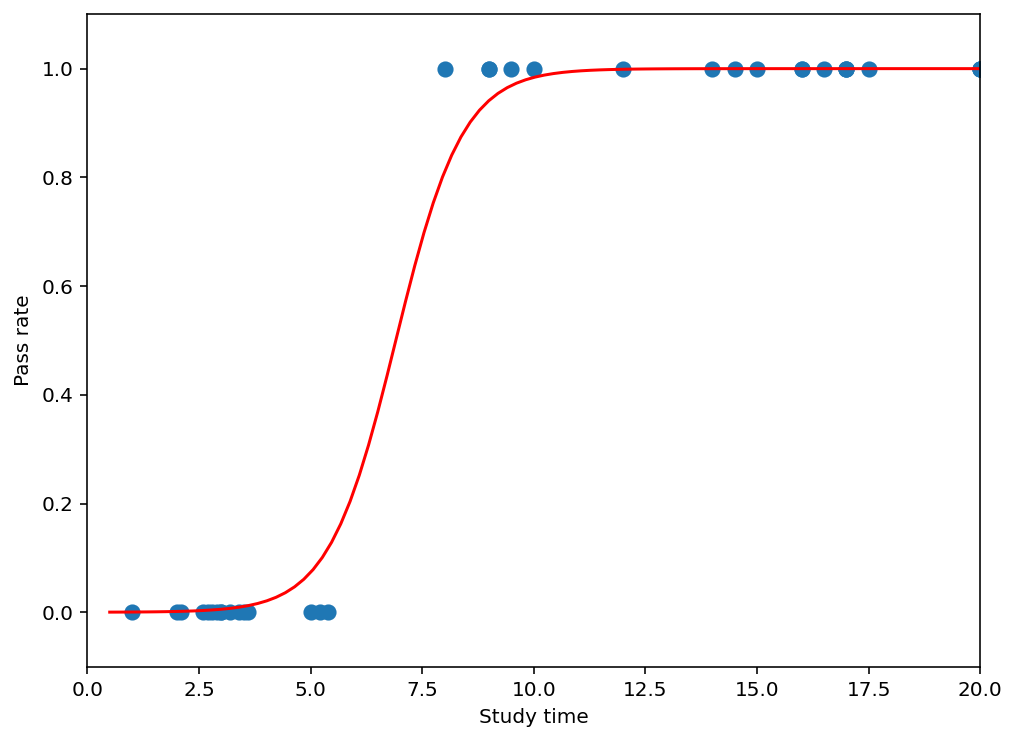

In [ ]:
def logistic(z):    # logistic function, aka Sigmoid function
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5, 21, 100)
yy = logistic(model.coef_*XX + model.intercept_)[0]  # model.coef_ is returned in (1,)
print(model.coef_, model.intercept_)
# print(XX, "\n-----------\n", yy)
plt.plot(XX, yy, c='r')
plt.show()

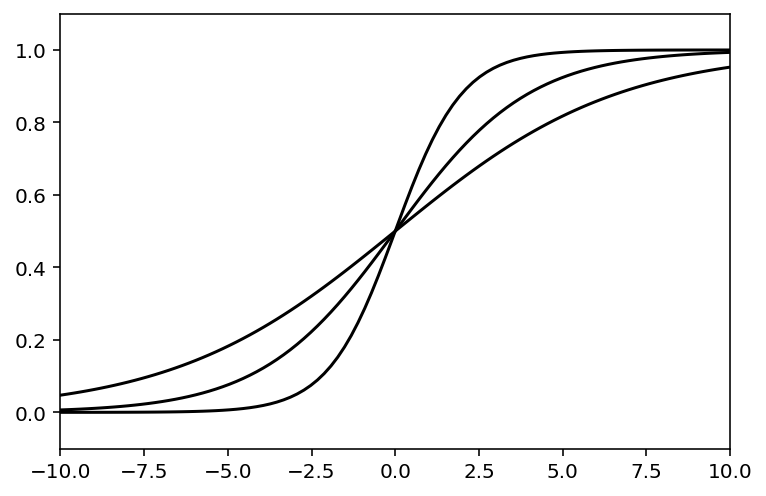

In [ ]:
def logistic(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logistic(a*XX + b)
        plt.plot(XX, yy, c='k')

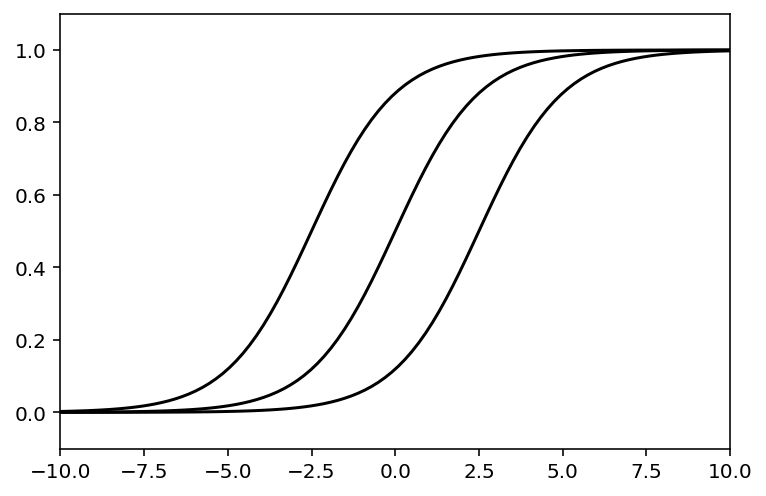

In [ ]:
def logistic(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logistic(a*XX + b)
        plt.plot(XX, yy, c='k')

## Breast Cancer Exmple 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn import metrics

In [ ]:
# from sklearn.datasets import load_breast_cancer

- download from Kaggle site (breast_cancer.csv of Wisconsin)
  - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
  - little different from sklearn.datasets.load_breast_cancer() in column names

In [3]:
data = pd.read_csv('archive.zip')
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [5]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.drop('Unnamed: 32',axis=1, inplace=True)

In [7]:
data_org = data.copy()
id(data), id(data_org)

(140631463113808, 140631462832848)

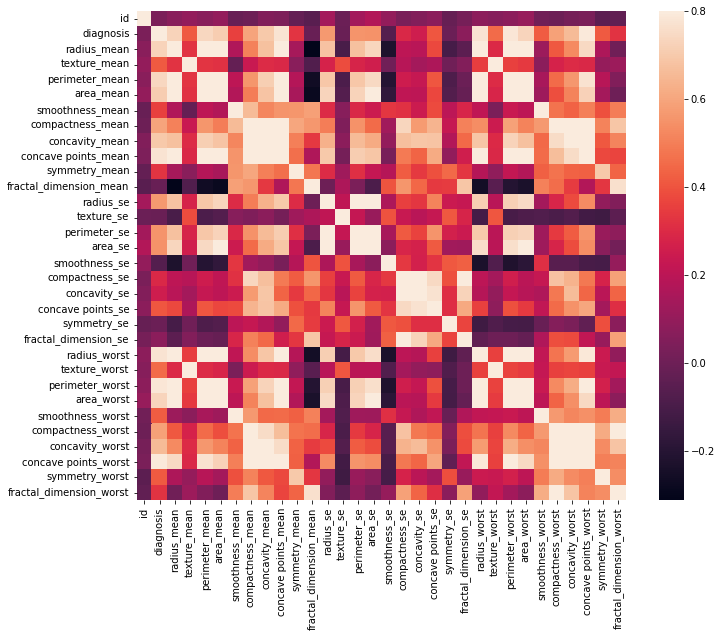

In [8]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
corrmat.nlargest(5, 'diagnosis').index   # just for checking

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst'],
      dtype='object')

In [12]:
corrmat.sort_values(by='diagnosis', ascending=False).head(10)   # just for checking

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,0.531062,-0.119638,0.554897,0.538166,-0.102007,0.483208,0.440472,0.602450,-0.030413,0.215204,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,-0.205151,0.719684,-0.102242,0.721031,0.761213,-0.217304,0.260516,0.226680,0.394999,-0.103753,-0.001000,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,-0.253691,0.715065,-0.111690,0.697201,0.757373,-0.230691,0.204607,0.186904,0.358127,-0.128121,-0.037488,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_worst,0.107187,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,-0.231854,0.751548,-0.083195,0.730713,0.811408,-0.182195,0.199371,0.188353,0.342271,-0.110343,-0.022736,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


In [16]:
model=LogisticRegression()
y = df["diagnosis"]

In [17]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))
print(model.coef_, model.intercept_)

Score: 85.38%
[[1.03283783]] [-15.35824085]


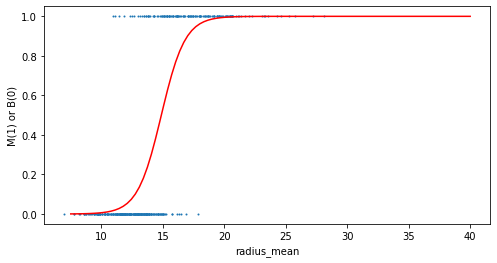

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logistic(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

In [19]:
features = ["texture_mean"]            # standard deviation
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 69.59%


In [20]:
print(model.coef_, model.intercept_)

[[0.24875651]] [-5.42869688]


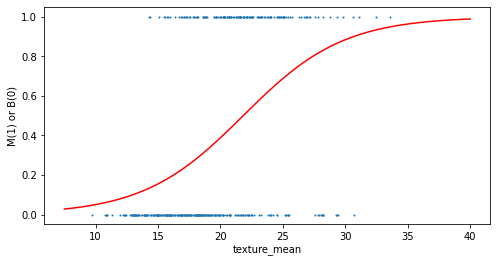

In [21]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

### Use two features

In [22]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 89.47%


Text(0, 0.5, 'texture_mean')

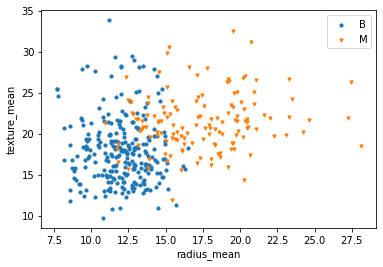

In [23]:
markers = ['o', 'v']
label = ["B", "M"]         # 양성, 악성
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

Score: 94.15%


Text(0, 0.5, 'perimeter_worst')

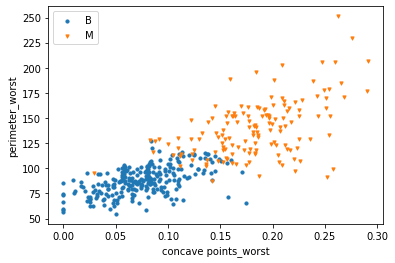

In [24]:
# one more time with two most correlated features
# 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst']
features = ["concave points_worst", "perimeter_worst"]

X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["concave points_worst"][y_train == i]
    ys = X_train["perimeter_worst"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

Score: 95.32%


Text(0, 0.5, 'perimeter_worst')

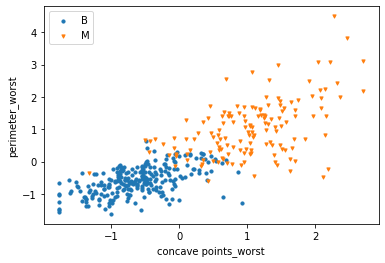

In [25]:
# with scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
model.fit(X_train_sc, y_train)
X_test_sc = sc.transform(X_test)

print("Score: {0:.2%}".format(model.score(X_test_sc, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train_sc[:,0][y_train == i]
    ys = X_train_sc[:,1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

### Use all features
- with scaling

In [26]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행
data = data_org.copy()
data.drop('id',axis=1, inplace=True)
X = data.drop('diagnosis', axis=1)

In [27]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
X_test = sc.transform(X_test)
print("Score: {:.2%}".format(model_all.score(X_train, y_train)))
print("Score: {:.2%}".format(model_all.score(X_test, y_test)))

Score: 99.25%
Score: 95.32%


In [28]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 94.74%
K =  3 -> Score: 95.91%
K =  5 -> Score: 96.49%
K =  7 -> Score: 96.49%
K =  9 -> Score: 97.66%
K =  11 -> Score: 97.66%
K =  13 -> Score: 97.66%
K =  15 -> Score: 96.49%
K =  17 -> Score: 95.91%
K =  19 -> Score: 95.32%


In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 91.23%


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)    # no. of trees
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


# Multi-class Classification
- LogisticRegression classifier(): 
- OvR and softmax() classifier
- In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

### two features

In [32]:
iris = datasets.load_iris()
X, y = iris.data[:,(2,3)], iris.target

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
ovr_clf = LogisticRegression(multi_class="ovr", C=10, random_state=42)
softmax_reg.fit(X, y)
ovr_clf.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
softmax_reg.score(X, y), ovr_clf.score(X, y)

(0.96, 0.96)

In [34]:
softmax_reg.coef_, softmax_reg.intercept_

(array([[-4.58614563, -2.24129385],
        [ 0.16068263, -2.15860167],
        [ 4.425463  ,  4.39989552]]),
 array([ 18.87514796,   6.3844344 , -25.25958236]))

In [35]:
ovr_clf.coef_, ovr_clf.intercept_

(array([[-4.10145565, -1.8601741 ],
        [ 1.42847909, -2.83149429],
        [ 4.42142146,  5.74004612]]),
 array([ 12.11411097,  -2.73490959, -31.06624834]))

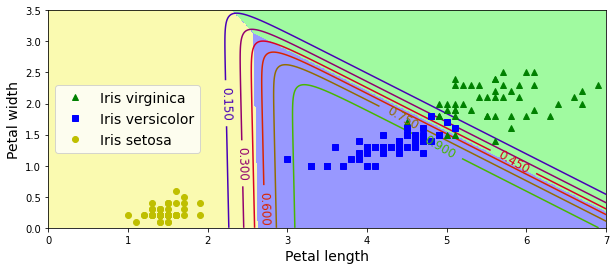

In [38]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
# zz2 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [ ]:
y_proba, zz1

(array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
        [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
        [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
        ...,
        [7.73770362e-23, 1.03687990e-11, 1.00000000e+00],
        [6.69680312e-23, 9.68354416e-12, 1.00000000e+00],
        [5.79592787e-23, 9.04357657e-12, 1.00000000e+00]]),
 array([[3.76140758e-06, 4.05882856e-06, 4.37976703e-06, ...,
         8.80661076e-02, 8.27274651e-02, 7.76848864e-02],
        [3.76688207e-06, 4.06473593e-06, 4.38614151e-06, ...,
         7.92318284e-02, 7.43850441e-02, 6.98122687e-02],
        [3.77236453e-06, 4.07065190e-06, 4.39252526e-06, ...,
         7.12145474e-02, 6.68226056e-02, 6.26832434e-02],
        ...,
        [5.00934839e-06, 5.40544567e-06, 5.83286283e-06, ...,
         1.30593207e-11, 1.21962542e-11, 1.13902262e-11],
        [5.01663917e-06, 5.41331295e-06, 5.84135218e-06, ...,
         1.16365575e-11, 1.08675189e-11, 1.01493046e-11],
        [5.02394057e-06,

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### four features

In [45]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
clf_all.score(X_test, y_test)

0.8666666666666667

In [41]:
y_pred = clf_all.predict(X_test)
from sklearn import metrics      # import the metrics class
metrics.confusion_matrix(y_test, y_pred)

array([[13,  4,  0],
       [ 0, 10,  1],
       [ 0, 12,  5]])

In [42]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(clf_all, X, y, cv=cv)
print(scores)
scores.mean()
# print(cross_val_score(SGDClassifier(), X, y, cv=cv))    # 거의 100%에 가까운 score 

[0.8        0.6        0.86666667 0.96666667 0.93333333]


0.8333333333333334

# Exercise

In [ ]:
# Softmax
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]


In [ ]:
np.exp(score)/np.exp(score).sum()

array([0.04500395, 0.07419897, 0.33253672, 0.54826036])

In [ ]:
# print 연습
for x in range(1, 11):
    print('{0:4d} {2:4d} {1:4d}'.format(x, x*x*x, x*x))

   1    1    1
   2    4    8
   3    9   27
   4   16   64
   5   25  125
   6   36  216
   7   49  343
   8   64  512
   9   81  729
  10  100 1000


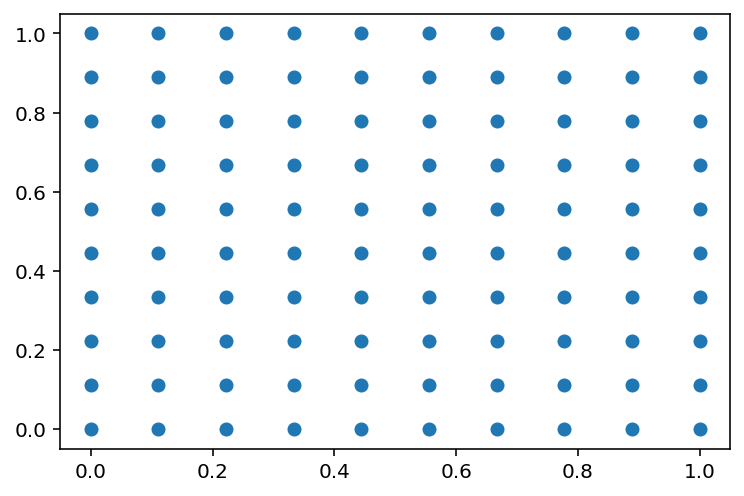

In [ ]:
# meshgrid()
x0, x1 = np.meshgrid(
        np.linspace(0, 1, 10).reshape(-1, 1),
        np.linspace(0, 1, 10).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
plt.scatter(X_new[:,0], X_new[:,1])